## 1. Import Necessary Libraries and Load Data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.preprocessing import StandardScaler

In [53]:
df = pd.read_csv('Downloads/data2.csv')
df

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0
...,...,...,...,...,...,...
9995,DOCTOR,2705,502092127427,09/27,422,1
9996,LAWYER,37862,349490624391408,07/34,811,0
9997,ENGINEER,83152,4990903961714432,11/24,216,1
9998,DOCTOR,90620,4827611166572112,01/33,180,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [55]:
df.isna().sum()

Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64

## 2. Data Cleaning and Preprocessing

In [57]:
# Handle missing values
df = df.dropna()

# Feature scaling (Standardize numerical features for clustering)
scaler = StandardScaler()
df[['Income', 'Security_code']] = scaler.fit_transform(df[['Income', 'Security_code']])

## 3. Clustering with K-Means

In [61]:
def kmeans_clustering(df, n_clusters):
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df[['Income', 'Security_code']])
    
    # Add cluster labels to the original data
    df['Cluster'] = clusters
    
    return df, kmeans

# Run K-Means clustering with 3 clusters
data_with_clusters, kmeans_model = kmeans_clustering(df, 3)

## 4. Line Fitting (Linear Regression)

In [63]:
def linear_regression_fit(data):
    # Prepare features and target variable
    X = df[['Income', 'Security_code']]
    y = df['Fraud']
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict
    predictions = model.predict(X)
    
    return model, predictions

# Fit the linear regression model
model, predictions = linear_regression_fit(df)

## 5. Generate the Required Graphs

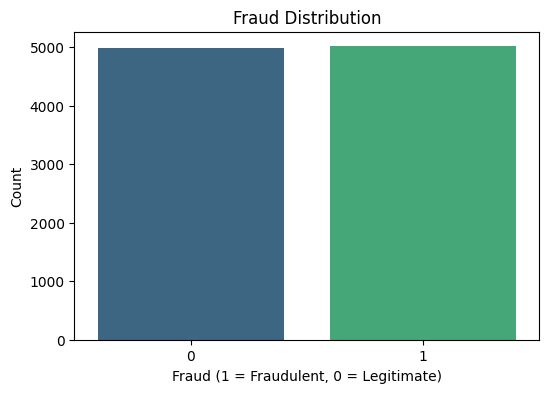

In [64]:
def plot_fraud_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Fraud', data=df, palette='viridis')
    plt.title('Fraud Distribution')
    plt.xlabel('Fraud (1 = Fraudulent, 0 = Legitimate)')
    plt.ylabel('Count')
    plt.show()

plot_fraud_distribution(df)

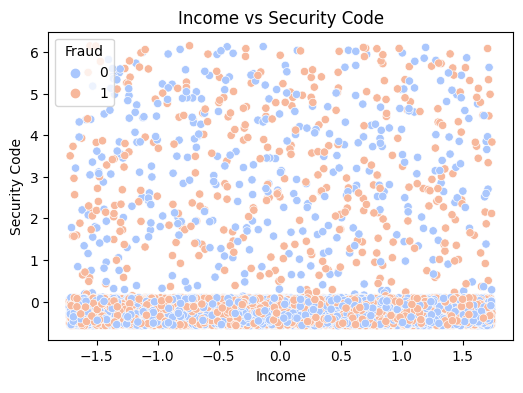

In [65]:
def plot_scatter_income_security(df):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='Income', y='Security_code', hue='Fraud', data=df, palette='coolwarm')
    plt.title('Income vs Security Code')
    plt.xlabel('Income')
    plt.ylabel('Security Code')
    plt.show()

plot_scatter_income_security(df)

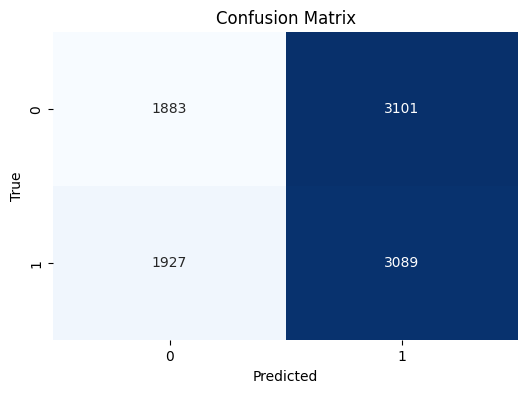

In [66]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Using the linear regression predictions (assuming binary 0/1)
plot_confusion_matrix(df['Fraud'], (predictions > 0.5).astype(int))

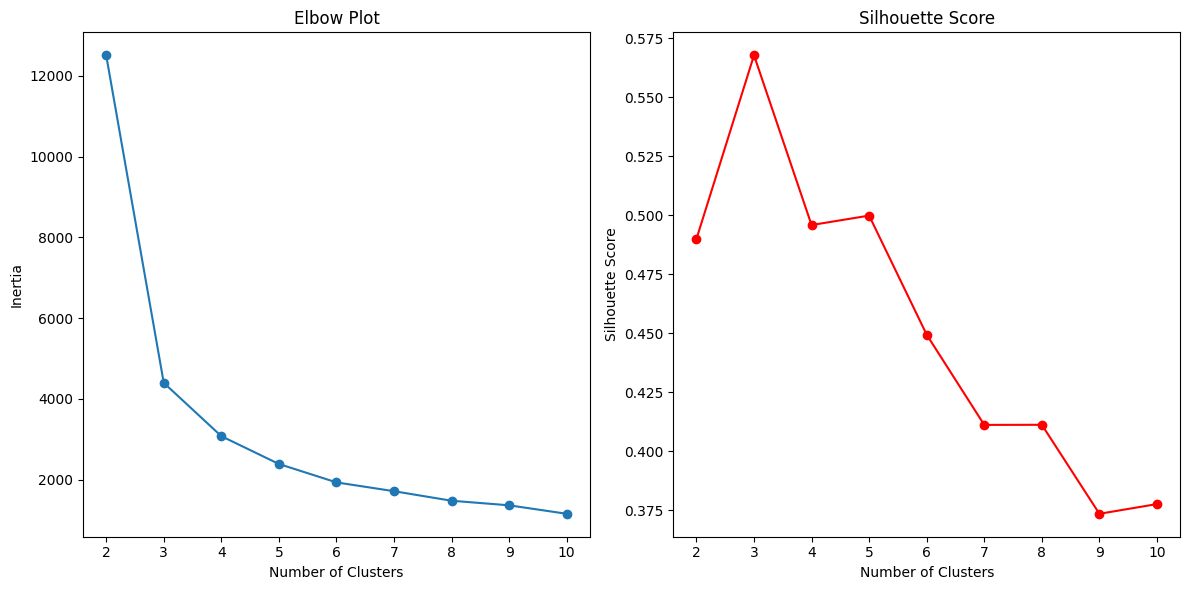

In [69]:
def plot_elbow_and_silhouette(df):
    inertia = []
    silhouette_scores = []
    for k in range(2, 11):  # Try 2 to 10 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df[['Income', 'Security_code']])
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df[['Income', 'Security_code']], kmeans.labels_))
    
    # Elbow Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), inertia, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    
    # Silhouette Plot
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    
    plt.tight_layout()
    plt.show()

plot_elbow_and_silhouette(df)